<a href="https://colab.research.google.com/github/Jsk10101/PlanetarySci/blob/main/NASA_Exoplanet_data_explorer_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tab = astropy.io.ascii.read("/content/drive/MyDrive/College/Junior/Planetary Science/Colab Notebooks/PS_2025.01.16_06.39.23.csv",)

In [4]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [5]:
import pandas as pd
df = tab.to_pandas()

num_unique_values = df['discoverymethod'].nunique()
print(num_unique_values)

counts = df['discoverymethod'].value_counts()

print(counts)

11
discoverymethod
Transit                          34423
Radial Velocity                   2579
Microlensing                       697
Transit Timing Variations          152
Imaging                            148
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           3
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64


In [6]:
# Splitting by types for later plotting
Transit_df = df[df['discoverymethod'] == 'Transit']
print(len(Transit_df))
Micro_df = df[df['discoverymethod'] == 'Microlensing']
print(len(Micro_df))
RV_df = df[df['discoverymethod'] == 'Radial Velocity']
print(len(RV_df))
TTV_df = df[df['discoverymethod'] == 'Transit Timing Variations']
print(len(TTV_df))
I_df = df[df['discoverymethod'] == 'Imaging']
print(len(I_df))
ETV_df = df[df['discoverymethod'] == 'Eclipse Timing Variations']
print(len(ETV_df))
OBM_df = df[df['discoverymethod'] == 'Orbital Brightness Modulation']
print(len(OBM_df))
Astro_df = df[df['discoverymethod'] == 'Astrometry']
print(len(Astro_df))

34423
697
2579
152
148
24
21
3


## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?


Text(0.5, 1.0, 'Mass vs Orbital Period')

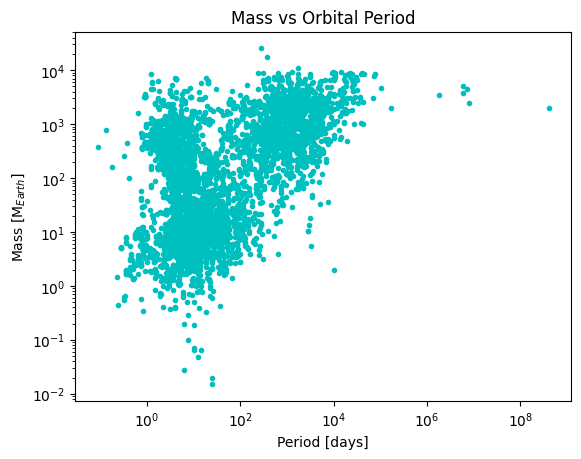

In [7]:
# Mass vs Period Plot
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "c.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.title("Mass vs Orbital Period")

Text(0.5, 1.0, 'Mass vs Semi-Major Axis')

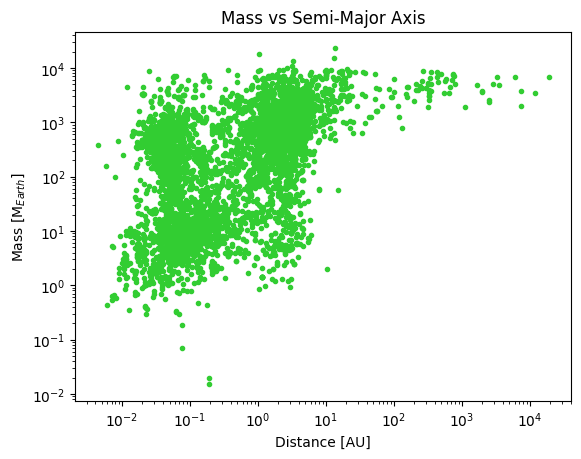

In [8]:
# Mass vs Semi-major axis plot
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], ".", color = 'limegreen')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.title("Mass vs Semi-Major Axis")

Text(0.5, 1.0, 'Radius vs Orbital Period')

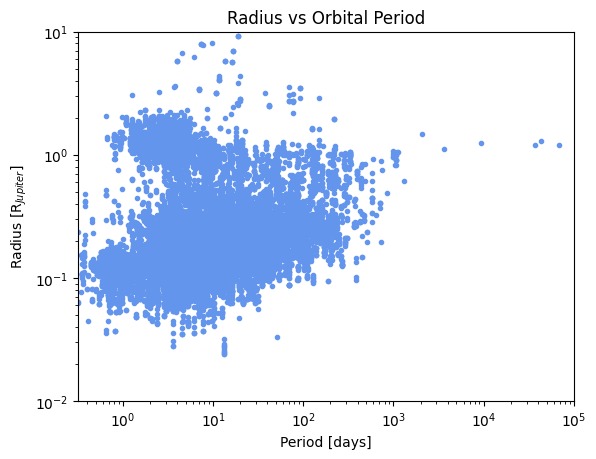

In [9]:
# Radius vs Period Plot
plt.plot(tab["pl_orbper"], tab["pl_radj"], '.', c='cornflowerblue')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**5)
plt.ylim(10**(-2), 10)
plt.title("Radius vs Orbital Period")

Text(0.5, 1.0, 'Radius vs Semi-Major Axis')

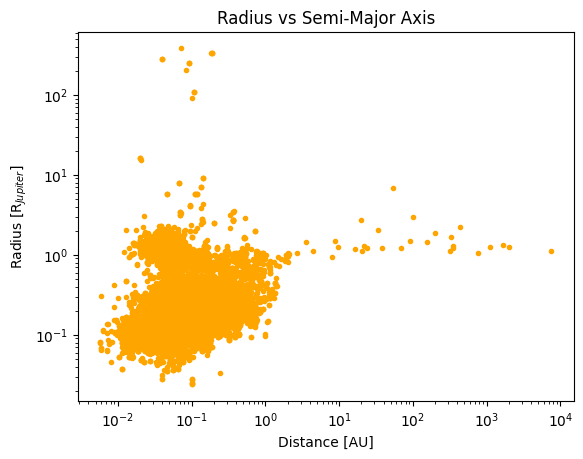

In [10]:
# Radius vs Semi-major axis plot
plt.plot(tab["pl_orbsmax"], tab["pl_radj"], '.', color = 'orange')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.title("Radius vs Semi-Major Axis")

## 2, Overplot solar system planets on the above plot?

In [11]:
Solar_system = {'Name': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
                'Mass': [0.055, 0.815, 1, 0.107, 318, 95, 14.5, 17],
                'SM-axis': [0.387, 0.723, 1, 1.52, 5.2, 9.54, 19.9, 30.1],
                'Period': [88, 225, 365, 687, 4333, 10759, 30687, 60190],
                'Radius': [0.034, 0.085, 0.089, 0.047, 1, 0.84, 0.36, 0.35]}

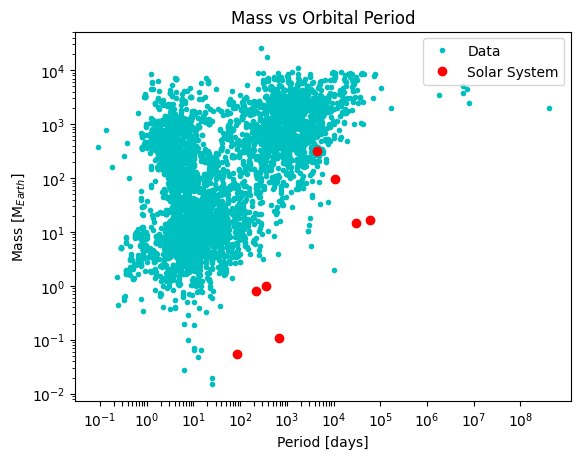

In [12]:
# Mass vs Period Plot
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "c.", label = 'Data')
plt.plot(Solar_system["Period"], Solar_system["Mass"], "ro", label = 'Solar System')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.title("Mass vs Orbital Period")
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1E3,2E3,3E3,4E3,5E3,6E3,7E3,8E3,9E3,1E4,1E5,1E6, 1E7, 1E8])
plt.legend()

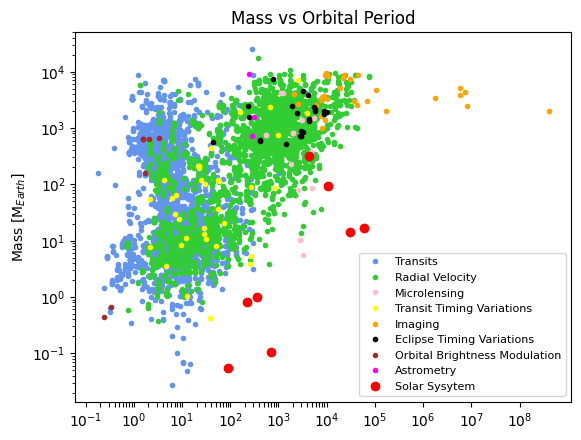

In [13]:
plt.plot(Transit_df["pl_orbper"], Transit_df["pl_bmasse"], ".", color = 'cornflowerblue', label = "Transits")
plt.plot(RV_df["pl_orbper"], RV_df["pl_bmasse"], ".", color = 'limegreen', label = "Radial Velocity")
plt.plot(Micro_df["pl_orbper"], Micro_df["pl_bmasse"], ".", color = 'pink', label = "Microlensing")
plt.plot(TTV_df["pl_orbper"], TTV_df["pl_bmasse"], ".", color = 'yellow', label = "Transit Timing Variations")
plt.plot(I_df["pl_orbper"], I_df["pl_bmasse"], ".", color = 'orange', label = "Imaging")
plt.plot(ETV_df["pl_orbper"], ETV_df["pl_bmasse"], ".", color = 'k', label = "Eclipse Timing Variations")
plt.plot(OBM_df["pl_orbper"], OBM_df["pl_bmasse"], ".", color = 'brown', label = "Orbital Brightness Modulation")
plt.plot(Astro_df["pl_orbper"], Astro_df["pl_bmasse"], ".", color = 'fuchsia', label = "Astrometry")
plt.plot(Solar_system["Period"], Solar_system["Mass"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1E3,2E3,3E3,4E3,5E3,6E3,7E3,8E3,9E3,1E4,1E5,1E6, 1E7, 1E8])
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.title("Mass vs Orbital Period")
plt.legend(prop = {'size':8})

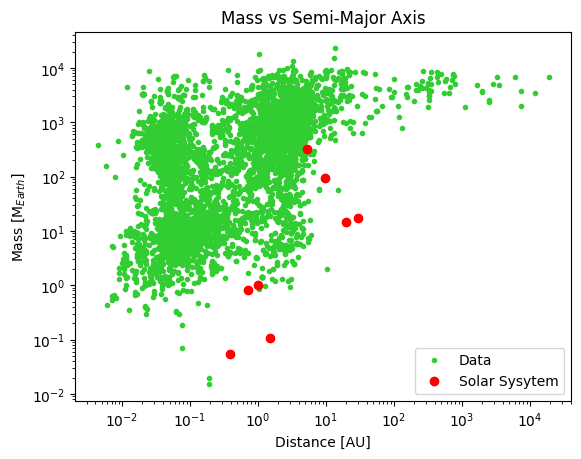

In [14]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], ".", color = 'limegreen', label = 'Data')
plt.plot(Solar_system["SM-axis"], Solar_system["Mass"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.title("Mass vs Semi-Major Axis")
plt.legend()

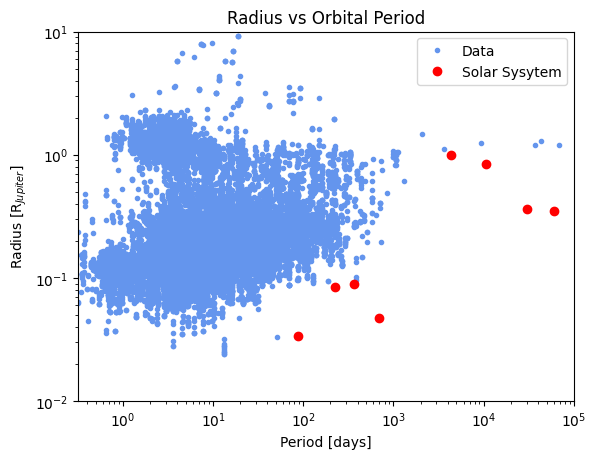

In [15]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], ".", color = 'cornflowerblue', label = 'Data')
plt.plot(Solar_system["Period"], Solar_system["Radius"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**5)
plt.ylim(10**(-2), 10)
plt.title("Radius vs Orbital Period")
plt.legend()

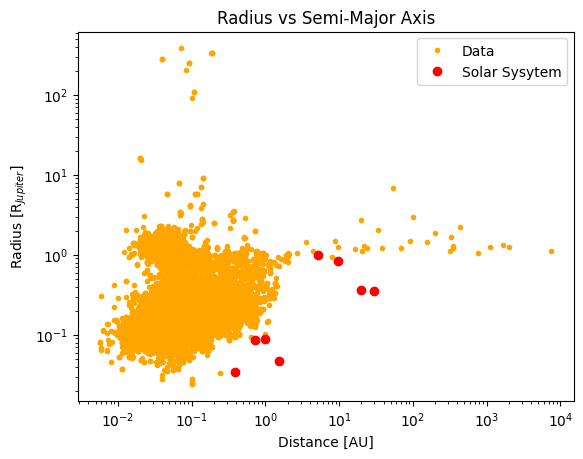

In [16]:
plt.plot(tab["pl_orbsmax"], tab["pl_radj"], ".", color = 'orange', label = 'Data')
plt.plot(Solar_system["SM-axis"], Solar_system["Radius"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.title("Radius vs Semi-Major Axis")
plt.legend()

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line.

Mass-Radius Relation is:

1. $R_p = M_p^{0.27}$ for small planets up to $M_p = 4.4 M_E$.

2. $R_p = M_p^{0.67}$ from $M_p = 4.4 M_E$ and up to $M_p = 127 M_E$.

3. $R_p = M_p^{-0.06}$ from $M_p = 127 M_E$ and beyond

Values taken from Abstract [here](https://ui.adsabs.harvard.edu/abs/2024A%26A...686A.296M/abstract#:~:text=Parc%2C%20L%C3%A9na-,Abstract,the%20current%20measured%20planetary%20population.&text=Keywords:,Astrophysics%20%2D%20Earth%20and%20Planetary%20Astrophysics).

While we didn't use these values, they are still relevant to the project's theme and are important values to understand for future use.

# Transit Sensitivity

For a given planet to earth ratio, the sensitivity of the signal is:
$ (\frac{R_p}{R_E})^2 = 3 \sqrt{\frac{P}{T}} $ \

$R_p$ is then isolated to produce the equation:
$ R_p = R_E\sqrt{3\sqrt{\frac{P}{T}}}$

This equation is used below:


In [17]:
# Import Constants and Units
import astropy.constants as ac
import astropy.units as u

In [18]:
# Makes a set of data points from 10^0 to 10^3 at increments of 0.01
P_arr = 10**np.arange(0,4,0.01) * u.day # Orbital Period in Days
T = 1 * u.year # Time Window (365 chances to observe)

# Sensitivity of Signal
R_p_arr = np.sqrt(3 * np.sqrt(P_arr / T)) * u.earthRad # In Earth Radii

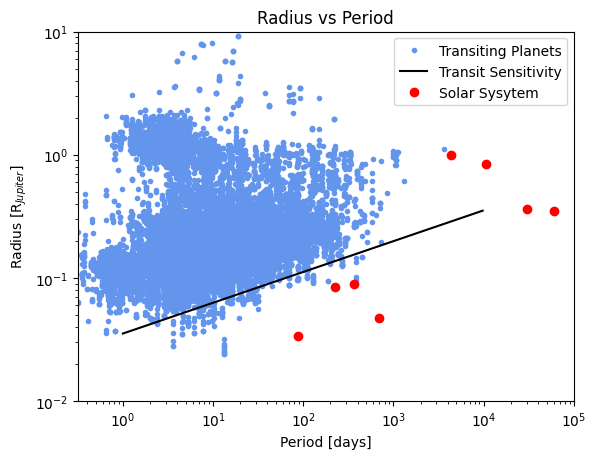

In [19]:
plt.plot(Transit_df['pl_orbper'], Transit_df['pl_radj'], ".", color = 'cornflowerblue', label="Transiting Planets")
plt.plot(P_arr.value, R_p_arr.to(u.jupiterRad).value, color = "k", label = "Transit Sensitivity")
plt.plot(Solar_system["Period"], Solar_system["Radius"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**5)
plt.ylim(10**(-2),10**1)
plt.title("Radius vs Period")
plt.legend()

# Radial Velocity Sensitivity

### For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 1 solar mass:

 $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

 $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

In [20]:
import astropy.constants as ac
import astropy.units as u

In [21]:
# Semi-Major Axis Array from 10^-2 to 10^2
sma_arr = 10.0**(np.arange(5)-2) * u.AU

# Mass of Planet Array using Semi-Major Axis Array
m_p_arr = 0.5 * u.meter / u.second * 1 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))

Text(0.5, 1.0, 'Mass vs Semi-Major Axis')

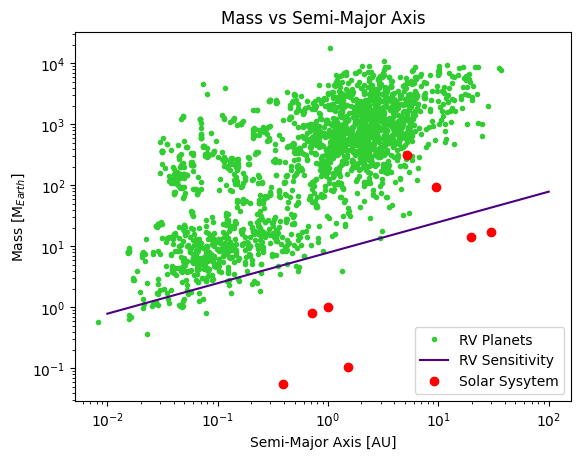

In [22]:
# Plot
plt.plot(RV_df["pl_orbsmax"], RV_df["pl_bmasse"], ".", color = 'limegreen', label = "RV Planets")
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="indigo", label = "RV Sensitivity")
plt.plot(Solar_system["SM-axis"], Solar_system["Mass"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.legend()
plt.title("Mass vs Semi-Major Axis")

# Direct Imaging Sensitivity

First, we will want to solve for the minimum orbital radius. If we look at the paper for [the Gemini Planet Imager](https://arxiv.org/abs/1508.03084), we can can find that an average of $λ = 1.65$ microns (H Band) used to find a given planet. And, we also know that an average diameter of a telescope used is $D = 10 $ meters for a general telescope.


Next, we solve for the diffraction limit, which is $θ = 1.22 \frac{λ}{D}$, where λ is the wavelength and D is the diameter of the telescope. We input our previous generalizations into our equation to conclude that $ θ = 0.042$ arcseconds.


After this, we can solve for the small angle approximation, that which is $θ=\frac{a}{d} $. We can make one final generalization, which is that the closest exoplanet to us is $d ≈ 100$ pc away, so with this we now know how to solve for the minimum orbital separation, which when isolated provides this equation: $a = θd$. This equation gives us an approximate minimum separation of $a = 4.152$ au away for direct imagery to work. This is the start of our line in the x-axis.

What we need to find next is the y-axis start, this can be done with our equation for reflected starlight, which is $f = (\frac{R_p}{R_⋆})^2\frac{B_⋆}{B_p}$, where $R$ is the Radius and $B$ is the Blackbody equation $B_v(T)=\frac{2hv^3}{c^2}\frac{1}{e^{hv/k_BT}-1}$, where $h$ is the bolzmann constant, $v$ is the frequency, $T$ is the temperature, and $c$ is the speed of light.

From this, we make these general assumptions :

1.  Any $f$ below $ f = 10^{-7}$ is an undetectable planet.
2.  $T_⋆ = 5000 K$ is the temperature for a general star.
3.  $T_p = 1000 K$ is the temperature for a general planet.
4.  The frequency $v = \frac{c}{λ}$.
5.  $R_⋆ = R_{sun}$

These will be our basic assumptions for the minimum radius of a planet.

With these values in hand, we can now solve for minimum $R_p$ without needing any other variables. When isolating and simplifying for $R_p$, we get:

$R_p = R_⋆\sqrt{\frac{f}{\frac{e^{hv/k_BT_p}-1}{e^{hv/k_BT_⋆}-1}}}$

With these in hand, we create the equations that we solved for in this text and then plot them down below.



In [23]:
import astropy.constants as ac
import astropy.units as u
import numpy as np

In [24]:
# Constants & Generalizations
l = 1.65 * u.micrometer # Units of microns
D = 10 *u.m # Units of meters
d = 100 * u.pc # Units of parsecs
# Creates equation using assumptions using above text
theta = 1.22 * (l.to(u.m) / D) *u.rad # Units of Degrees
# Convert to arcminutes
theta = theta.to(u.arcsecond) # Units of Arcsec
print(theta)
# Creates equation using above text
a_0 = theta.value * d # Should be just units of parsecs, so I used .value on theta
# This is our basic boundary value for Semi-Major Axis
print("Our minimum value for a is: ", round(a_0.value,3), "AU")

0.0415211054975405 arcsec
Our minimum value for a is:  4.152 AU


In [25]:
# Constants & Assumptions
h = ac.h # Units of Joule Seconds
c = ac.c # Units of Meters per Second
k = ac.k_B # Units of Joule per Kelvin
T_s = 5000 * u.K # Units of Kelvin of Star
T_p = 1000 * u.K # Units of Kelvin for Planet
l = 1.65 * u.micrometer # Units of microns
f = 1E-7 # Flux | Unitless
R_s = u.solRad

# Wavelength to Frequency
v = c / l

# Black Body Equation
B = (np.exp(h*v / (k*T_s)) - 1) / (np.exp(h*v / (k*T_p)) - 1)

# Total Equation
R_p = R_s*np.sqrt(f/B)
R_p = R_p.to(u.jupiterRad)
print(R_p)

0.11082832497786883 jupiterRad


In [26]:
# Semi-Major Axis Vertical Array
sma_arr = np.arange(round(a_0.value), 1E+3) * u.AU

# Planet Radius
R_p_arr = np.arange(R_p.value, 1E+3) * u.jupiterRad

Text(0.5, 1.0, 'Radius vs Semi-Major Axis')

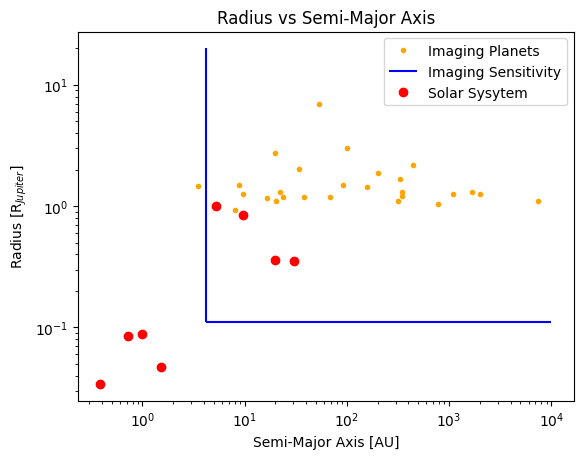

In [27]:
# Plotting Code
plt.plot(I_df["pl_orbsmax"], I_df["pl_radj"], ".", color = 'orange', label = "Imaging Planets")
plt.vlines(x = a_0.value, ymin = R_p.value, ymax = 2E1, color = "blue")
plt.hlines(y = R_p.value, xmin = a_0.value, xmax = 1E4, color="blue", label = "Imaging Sensitivity")
plt.plot(Solar_system["SM-axis"], Solar_system["Radius"], "ro", label = 'Solar Sysytem')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.legend()
plt.title("Radius vs Semi-Major Axis")

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.